In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
data = pd.read_excel('Variavel_out.xlsx', sheet_name='LookerStudio')
print(data.tail(10))

     Index     peso  comprimento_Total  comprimento_Padrao  \
937    NaN  1013.74               36.0                30.3   
938    NaN   795.64               34.5                28.3   
939    NaN   911.28               35.5                29.8   
940    NaN   898.40               36.0                30.2   
941    NaN   810.48               34.5                28.6   
942    NaN   822.67               36.0                30.6   
943    NaN   653.60               32.0                26.7   
944    NaN   905.54               35.2                28.8   
945    NaN   754.89               33.3                29.4   
946    NaN   756.22               33.3                28.2   

     comprimento_Cabeça  altura  espessura  
937                 9.8    11.6        3.5  
938                 9.2    10.8        3.2  
939                 8.2    10.8        3.1  
940                 9.5    10.7        3.0  
941                 9.5    10.2        3.1  
942                 9.0    10.6        3.2  
94

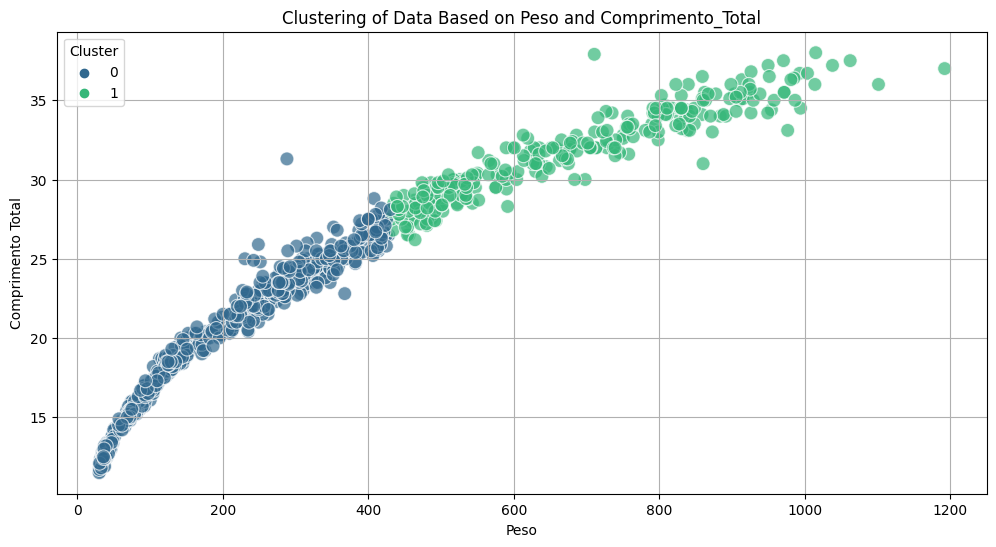

In [7]:

# Select relevant features for clustering
features = data[['peso', 'comprimento_Total', 'comprimento_Padrao', 'comprimento_Cabeça', 'altura', 'espessura']]

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Plot the data to visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='peso',
    y='comprimento_Total',
    hue='Cluster',
    palette='viridis',
    data=data,
    s=100,
    alpha=0.7
)

plt.title('Clustering of Data Based on Peso and Comprimento_Total')
plt.xlabel('Peso')
plt.ylabel('Comprimento Total')
plt.grid(True)
plt.show()


In [8]:
# Group by cluster and find the minimum and maximum 'peso' for each
cluster_limits = data.groupby('Cluster')['peso'].agg(['min', 'max']).reset_index()

# Display the limits for each cluster
cluster_limits

,Cluster,min,max
0,0,30.27,430.29
1,1,431.12,1192.00


In [ ]:
peso_threshold = cluster_limits.loc[cluster_limits['Cluster'] == 0, 'max'].values[0]
peso_threshold

430.29

In [ ]:
# Creating a copy of the data 
df=data.copy()
# Create a new column 'cluster' based on the threshold
df['cluster'] = (df['peso'] > peso_threshold).astype(int)

# Check the distribution of the clusters
print("Cluster Distribution:")
print(df['cluster'].value_counts())

# Separate the data based on clusters
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

# Displaying the separated clusters for verification
print("\nCluster 0 (peso <= threshold):\n", cluster_0.head())
print("\nCluster 1 (peso > threshold):\n", cluster_1.head())